# Loading and Exploring Log LAS Files With Python

## Introduction

Log ASCII Standard (LAS) files are a common file format storing and transferring well log data in the oil and gas industry. 

A LAS file is a file format that was developed by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well.

This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

The well data used in this notebook are from the Maui gas field in Offshore Taranaki Basin, New Zealand

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
Lasio library is the most popular python library for reading .las files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

To load our file in, use the `.read()` method from LASIO. Here, I will be loading Maui-6 .las file

In [139]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-6_final.las")

Only engine='normal' can read wrapped files


## Loading and Checking Data
In this step we are going to load, check and explore the sections in a typical las file

In [140]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [141]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="YES", descr="Multiple lines per de")]

Now that our file has been loaded, we can start investigating it's contents especially the header section which contained information about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [142]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

START DEPTH (STRT): 		 10.0584
STOP DEPTH (STOP): 		 3227.9844
STEP (STEP): 		 0.1524
NULL VALUE (NULL): 		 -999.25
COMPANY (COMP): 		 
WELL (WELL): 		 Maui-6
FIELD (FLD): 		 
LOCATION (LOC): 		 
COUNTRY (CTRY): 		 
STATE (STAT): 		 
COUNTY (CNTY): 		 
SERVICE COMPANY (SRVC): 		 Shell BP & Todd Oil Services Ltd
DATE (DATE): 		 
API NUMBER (API): 		 
UNIQUE WELL ID (UWI): 		 100000113531
LATITUDE (LATI): 		 -39.5296319
LONGITUDE (LONG): 		 173.4074213


In [143]:
las.well.WELL.value

'Maui-6'

by looping through `las.curves`, we can quickly see and print the log curve mnemonic.

In [144]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
BS
CALI
DENS
DENS_CORR
DRHO
DTC
GR
GR_CORR
NEUT
NEUT_CORR
PEF
RESD
RESD_CORR
RESM
RESM_CORR
RESS
RESS_CORR
SP
TEMP
TENS


To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.

In [145]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: Caliper Log (CALI)
Curve: DENS, 	 Units: G/C3, 	 Description: Compensated Formation Density Log (RHOB)
Curve: DENS_CORR, 	 Units: G/C3, 	 Description: Borehole corrected density log
Curve: DRHO, 	 Units: G/C3, 	 Description: Density Log Correction (DRHO)
Curve: DTC, 	 Units: US/F, 	 Description: Delta T (DT)
Curve: GR, 	 Units: GAPI, 	 Description: Gamma-Ray Log (GR)
Curve: GR_CORR, 	 Units: GAPI, 	 Description: Gamma ray corrected
Curve: NEUT, 	 Units: V/V, 	 Description: Neutron Log Porosity (NPHI) and Thermal Neutron Porosity (TNPH)
Curve: NEUT_CORR, 	 Units: V/V, 	 Description: Corrected NPHI (limestone units)
Curve: PEF, 	 Units: B/E, 	 Description: Photoelectric Factor (PEF)
Curve: RESD, 	 Units: OHMM, 	 Description: Induction Deep Resistivity (ILD)
Curve: RESD_CORR, 	 Units: OHMM, 	 Description: Borehole corrected ILD
Curve: RESM,

We can easily be removed the curves we don't need from the LAS file by using the 'las.delete_curve'.

In [146]:
las.delete_curve('GR_CORR')

In [147]:
las.delete_curve('NEUT_CORR')

In [148]:
las.delete_curve('DENS_CORR')

In [149]:
las.delete_curve('RESD_CORR')

In [150]:
las.delete_curve('RESM_CORR')

In [151]:
las.delete_curve('RESS_CORR')

In [152]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: Caliper Log (CALI)
Curve: DENS, 	 Units: G/C3, 	 Description: Compensated Formation Density Log (RHOB)
Curve: DRHO, 	 Units: G/C3, 	 Description: Density Log Correction (DRHO)
Curve: DTC, 	 Units: US/F, 	 Description: Delta T (DT)
Curve: GR, 	 Units: GAPI, 	 Description: Gamma-Ray Log (GR)
Curve: NEUT, 	 Units: V/V, 	 Description: Neutron Log Porosity (NPHI) and Thermal Neutron Porosity (TNPH)
Curve: PEF, 	 Units: B/E, 	 Description: Photoelectric Factor (PEF)
Curve: RESD, 	 Units: OHMM, 	 Description: Induction Deep Resistivity (ILD)
Curve: RESM, 	 Units: OHMM, 	 Description: Medium Induction Log (ILM)
Curve: RESS, 	 Units: OHMM, 	 Description: Shallow Laterolog (LLS) and Spherically Focused Log Unaveraged (SFLU)
Curve: SP, 	 Units: MV, 	 Description: Spontaneous Potential Log (SP)
Curve: TEMP, 	 Units: DEGC, 	 Description: Measured Tem

In [153]:
las.write('/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-6_final.las')

## Converting LAS File to a Pandas Dataframe
LASIO file can be converted to a pandas dataframe using the .df() function.This allow machine learning algorithm

In [154]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [155]:
well.head()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS
DEPTH,,,,,,,,,,,,,,
10.0584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493.9228
10.2108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492.7475
10.3632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.5722
10.5156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.4045
10.6680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489.3037


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [156]:
well.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS
count,20072.000000,19714.000000,17959.000000,18031.000000,17933.000000,19510.000000,17995.000000,18054.000000,19696.000000,18008.000000,19776.000000,19810.000000,18195.000000,21042.000000
mean,12.421496,12.536873,2.306188,-0.002523,101.675838,74.068437,0.318185,2.930954,3.013377,12.244660,2.838723,-16.090280,62.595108,873.031652
std,5.367973,4.139234,0.174792,0.031918,22.909808,17.154548,0.088690,0.403664,31.828742,119.106790,5.155760,58.187681,18.943277,272.627018
min,8.500000,7.884000,0.821900,-0.959700,35.722300,10.364000,0.022702,1.823400,0.575700,0.230800,0.570000,-66.099000,36.442900,367.040300
25%,8.500000,9.639875,2.160300,-0.012600,82.641100,66.104550,0.258287,2.702800,1.237875,0.923900,1.266375,-40.639525,45.643700,618.724400
50%,12.250000,12.159000,2.303200,-0.006700,94.790700,78.780400,0.330124,2.868600,1.598550,1.382500,1.696150,-34.745950,59.052800,908.893000
75%,12.250000,12.639675,2.447000,0.001200,121.320800,85.870375,0.390138,3.132400,3.102875,3.133825,3.548725,-23.364825,79.164900,1091.768100
max,36.000000,25.588500,2.785900,1.100500,170.583200,143.357200,0.574024,5.302800,1913.306500,2000.000000,229.518200,174.507100,97.699100,1458.173800


In [157]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21116 entries, 10.0584 to 3227.9844
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      20072 non-null  float64
 1   CALI    19714 non-null  float64
 2   DENS    17959 non-null  float64
 3   DRHO    18031 non-null  float64
 4   DTC     17933 non-null  float64
 5   GR      19510 non-null  float64
 6   NEUT    17995 non-null  float64
 7   PEF     18054 non-null  float64
 8   RESD    19696 non-null  float64
 9   RESM    18008 non-null  float64
 10  RESS    19776 non-null  float64
 11  SP      19810 non-null  float64
 12  TEMP    18195 non-null  float64
 13  TENS    21042 non-null  float64
dtypes: float64(14)
memory usage: 2.4 MB


### Quick Plot

Using the ploting function within pandas, we can plot all curves on a single plot.

<AxesSubplot:xlabel='DEPTH'>

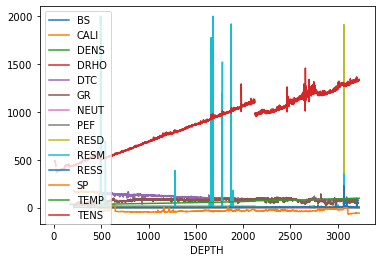

In [158]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales.

Lets plot individual curves by supplying a y variable argument like so:

<AxesSubplot:xlabel='DEPTH'>

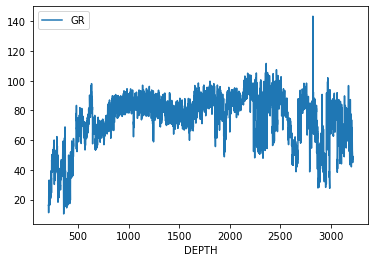

In [159]:
well.plot(y='GR')

This allows us to view the Gamma Ray Curve on its own. We can change the variable to any other curve within the dataframe and view it as follows: 

<AxesSubplot:xlabel='DEPTH'>

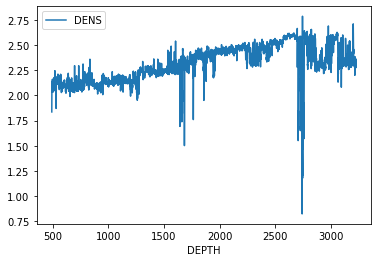

In [160]:
well.plot(y='DENS')

<AxesSubplot:xlabel='DEPTH'>

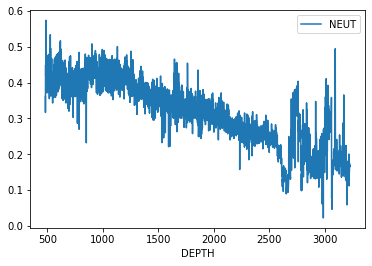

In [161]:
well.plot(y='NEUT')

<AxesSubplot:xlabel='DEPTH'>

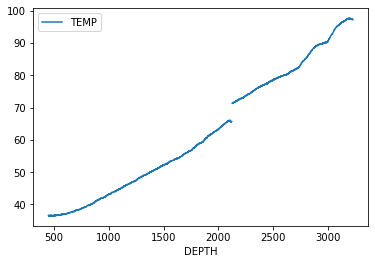

In [162]:
well.plot(y='TEMP')

<AxesSubplot:xlabel='DEPTH'>

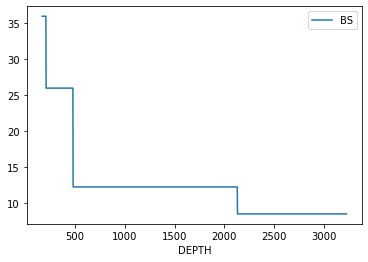

In [163]:
well.plot(y='BS')

<AxesSubplot:xlabel='DEPTH'>

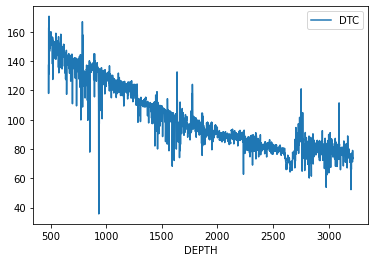

In [164]:
well.plot(y='DTC')

<AxesSubplot:xlabel='DEPTH'>

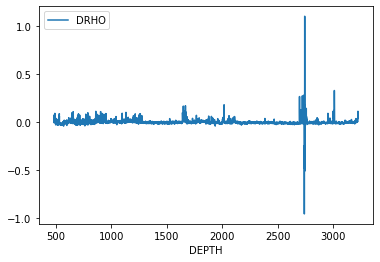

In [165]:
well.plot(y='DRHO')